# Asset return



*   The code is a Python script that obtains stock information for a given ticker symbol from the yfinance library. 
* It asks the user for a desired ticker symbol and year for which to obtain the stock information. 
* The script calculates moving averages for 20, 50, 100 and 200 days and plots the close price and moving averages on a graph. 
* It also prints the market cap of the stock. 
* Finally, the script plots a graph of the 5-year return of the stock in percentage.




In [15]:
!pip install yfinance pandas matplotlib

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter ticker symbol of your desire:mttr
Enter desired year:.5
**********************

Ticker Symbol: MTTR
Desired year/s of return: .5y
Market Cap of MTTR is: 1103784935.3284836



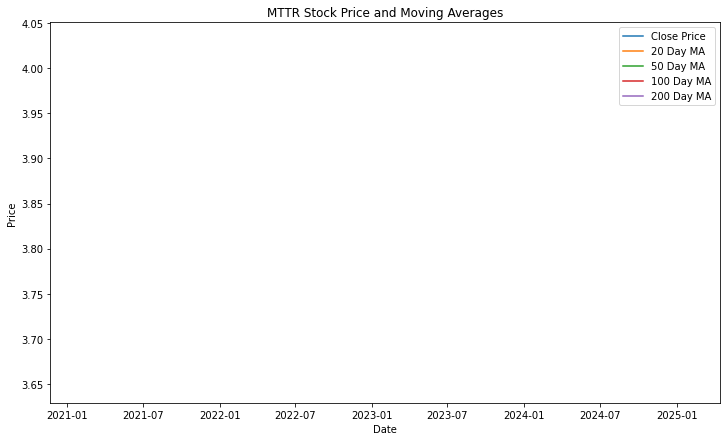

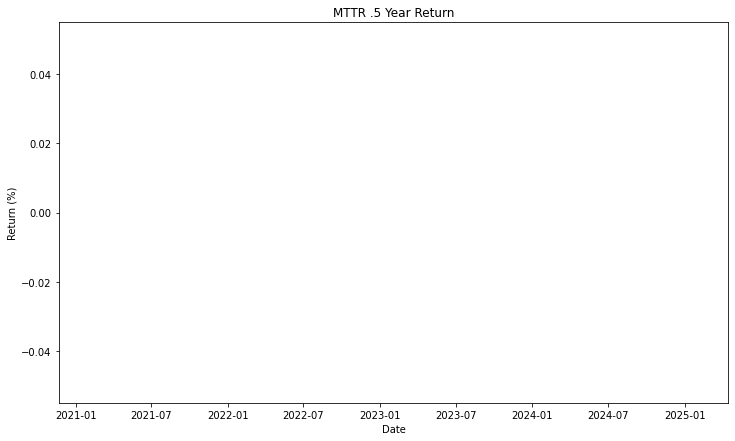

In [20]:


ticker = str(input("Enter ticker symbol of your desire:"))

# Getting stock data from the yf
data = yf.Ticker(ticker).info

User_year = input('Enter desired year:')

year = str(User_year)+'y'

# Get historical price data for user desired year/s
df = yf.Ticker(ticker).history(period= year)

# Calculate moving averages for 20, 50, 100 and 200 day
df["20d"] = df["Close"].rolling(window=20).mean()
df["50d"] = df["Close"].rolling(window=50).mean()
df["100d"] = df["Close"].rolling(window=100).mean()
df["200d"] = df["Close"].rolling(window=200).mean()

print(f"**********************\n")
# Print some additional information about the stock
print(f"Ticker Symbol: {ticker.upper()}")
print(f"Desired year/s of return: {year}")

#returning market cap from data dictionary
#fast_info.keys()
stock = yf.Ticker(ticker)
fast_info = stock.fast_info
print(f"Market Cap of {ticker.upper()} is: {fast_info['market_cap']}\n")

# Plot price and moving averages using matplotlib
plt.figure(figsize=(12,7))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["20d"], label="20 Day MA")
plt.plot(df["50d"], label="50 Day MA")
plt.plot(df["100d"], label="100 Day MA")
plt.plot(df["200d"], label="200 Day MA")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"{ticker.upper()} Stock Price and Moving Averages")
plt.show()

print()

# Plotting  5 year return
plt.figure(figsize=(12,7))
plt.plot((df["Close"] - df["Close"].iloc[0]) / df["Close"].iloc[0] * 100)
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.title(f"{ticker.upper()} {User_year} Year Return")
plt.show()